<h1>NMF<h1>

In [2]:
# folder path
folder_path = "Theses_clean_data/final_patent_text.csv"

# Installing packages

In [4]:
!pip install pyldavis

In [5]:
pip install scispacy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz (14.8 MB)
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade pyLDAvis gensim

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade joblib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [10]:
! pip install SpaCy
! python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
import pandas as pd
import random
import numpy as np
import re
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, Phrases
from gensim.models.phrases import Phraser
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from gensim.models import LdaMulticore, CoherenceModel
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import tqdm
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (6, 5)
sns.color_palette("muted")

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /Users/mike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mike/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mike/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
import umap
import matplotlib.pyplot as plt

In [14]:
from gensim.models.nmf import Nmf

In [15]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Adding custom stopwords

In [17]:
stopwords_path = 'USPTO_stopwords_en.txt'

In [18]:
uspto_stopwords = open('USPTO_stopwords_en.txt',"r")
print(uspto_stopwords.read())

a
accordance
according
all
also
an
and
another
are
as
at
be
because
been
being
by
claim
comprises
corresponding
could
described
desired
do
does
each
embodiment
fig
figs
for
from
further
generally
had
has
have
having
herein
however
if
in
into
invention
is
it
its
means
not
now
of
on
onto
or
other
particularly
preferably
preferred
present
provide
provided
provides
relatively
respectively
said
should
since
some
such
suitable
than
that
the
their
then
there
thereby
therefore
thereof
thereto
these
they
this
those
thus
to
use
various
was
were
what
when
where
whereby
wherein
which
while
who
will
with
would



In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
print(stop_words)

{'did', "it's", 'after', "she'd", 'its', 'here', 'ain', 'him', 'between', 'or', 'them', 'ma', "we'd", "he's", 'm', "we'll", 'don', 'needn', 'all', 'itself', "they'd", 'shouldn', "i'll", 'same', 'been', 'himself', 'on', 'd', 'we', 're', 'over', "weren't", 'mightn', 'into', "aren't", "shan't", "mightn't", 'mustn', 'and', 'by', 'are', 'doesn', 'such', 'ours', 'should', "you've", 'most', "needn't", 'his', "that'll", 'aren', 'each', 'shan', 'up', 'do', "she's", 'hers', 'other', 'this', 'that', 'where', 'has', 'because', 'until', 'about', "isn't", "i'd", 'no', 'i', 'herself', 'our', 'now', 's', 'am', 'be', 'before', "couldn't", 'have', 'he', 'through', 'ourselves', "she'll", 'yourself', 'isn', 'too', 'll', 'y', 'yourselves', "hadn't", "you'll", 'once', 'own', 'with', 'what', "didn't", 'whom', "wouldn't", "he'll", 'at', 'it', 'both', 'the', 'when', "should've", 't', 'while', "wasn't", 'under', 'in', 'below', 'as', 'those', 'against', 'having', 'hadn', "it'll", "they'll", 'to', 'some', 'any', 

In [21]:
# stopwords to add: one, first, second, comprising, least, method, end

In [22]:
number_words = [
            "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
            "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth",
            "eleventh", "twelfth", "thirteenth", "fourteenth", "fifteenth", "sixteenth", "seventeenth", "eighteenth", "nineteenth", "twenty",]

In [23]:
extra_stopwords = ["comprising", "least", "method", "end", "set"]

In [24]:
df = pd.read_csv(folder_path)

In [25]:
#extending nltk corpus stopwords
uspto_stopwords = set()
with open("USPTO_stopwords_en.txt", "r", encoding="utf-8") as file:
    uspto_stopwords = {line.strip() for line in file if line.strip()}

extended_stopwords = stop_words.union(extra_stopwords, number_words, uspto_stopwords)
print(list(extended_stopwords)[:])

["it's", "she'd", 'here', 'ain', 'him', 'between', 'or', "we'd", 'don', 'needn', 'two', 'itself', 'shouldn', "i'll", 'himself', 'we', 'over', "weren't", 'mightn', 'into', "aren't", "mightn't", 'and', 'by', 'doesn', 'such', 'ours', 'desired', 'should', "you've", "needn't", "that'll", 'his', 'nine', 'shan', 'claim', "she's", 'hers', 'this', 'that', 'until', 'about', 'preferably', "isn't", 'no', 'now', 'particularly', 'before', 'seventeenth', 'have', 'through', 'third', 'six', 'yourself', 'seven', 'too', 'yourselves', "hadn't", "you'll", 'set', 'what', 'respectively', 'thus', 'whom', "wouldn't", 'ninth', "he'll", 'at', 'described', 'when', "should've", 't', 'while', "wasn't", 'one', 'in', 'figs', 'below', 'whereby', 'also', 'those', 'against', 'having', 'hadn', 'to', 'ten', 'your', "haven't", 'didn', "they've", "you're", 'they', 'generally', 'there', "they're", 'least', 'can', 'provide', "hasn't", 'yours', "i'm", 'sixth', 'out', 'fourteenth', 'does', 'her', 'weren', 'was', 'haven', 'is', 

In [26]:
print(extended_stopwords)

{"it's", "she'd", 'here', 'ain', 'him', 'between', 'or', "we'd", 'don', 'needn', 'two', 'itself', 'shouldn', "i'll", 'himself', 'we', 'over', "weren't", 'mightn', 'into', "aren't", "mightn't", 'and', 'by', 'doesn', 'such', 'ours', 'desired', 'should', "you've", "needn't", "that'll", 'his', 'nine', 'shan', 'claim', "she's", 'hers', 'this', 'that', 'until', 'about', 'preferably', "isn't", 'no', 'now', 'particularly', 'before', 'seventeenth', 'have', 'through', 'third', 'six', 'yourself', 'seven', 'too', 'yourselves', "hadn't", "you'll", 'set', 'what', 'respectively', 'thus', 'whom', "wouldn't", 'ninth', "he'll", 'at', 'described', 'when', "should've", 't', 'while', "wasn't", 'one', 'in', 'figs', 'below', 'whereby', 'also', 'those', 'against', 'having', 'hadn', 'to', 'ten', 'your', "haven't", 'didn', "they've", "you're", 'they', 'generally', 'there', "they're", 'least', 'can', 'provide', "hasn't", 'yours', "i'm", 'sixth', 'out', 'fourteenth', 'does', 'her', 'weren', 'was', 'haven', 'is', 

In [27]:
print(f"Extended Stopwords: {len(extended_stopwords)} words")
print(f"NLTK Stopwords: {len(stop_words)} words")

Extended Stopwords: 274 words
NLTK Stopwords: 198 words


In [28]:
columns = 8
stop = list(extended_stopwords)
rows = (len(stop) + columns - 1) // columns
table_data = [stop[i * columns : (i + 1) * columns] for i in range(rows)]

df_stop_words = pd.DataFrame(table_data)
print(df_stop_words.to_string(index=False, header=False))

       it's     she'd       here           ain       him      between           or       we'd
        don     needn        two        itself   shouldn         i'll      himself         we
       over   weren't     mightn          into    aren't     mightn't          and         by
      doesn      such       ours       desired    should       you've      needn't    that'll
        his      nine       shan         claim     she's         hers         this       that
      until     about preferably         isn't        no          now particularly     before
seventeenth      have    through         third       six     yourself        seven        too
 yourselves    hadn't     you'll           set      what respectively         thus       whom
   wouldn't     ninth      he'll            at described         when    should've          t
      while    wasn't        one            in      figs        below      whereby       also
      those   against     having          hadn        to    

# Def preprocessing functions

In [30]:
df = df['Claims']
#sample_df = df['Claims'].sample(n=1000, random_state=42).dropna().tolist()

In [31]:
#def tokenization using gensim
def tokenize_text(text):
    return gensim.utils.simple_preprocess(text, deacc=True)

In [32]:
# tokenize & remove stopwords
def tokenize(texts, extended_stopwords):
    return [[word for word in tokenize_text(text) if word not in extended_stopwords] for text in texts]

In [33]:
#Creating n-grams
def create_ngrams(texts, min_count=5, threshold=100):
    bigram_phrases = gensim.models.Phrases(texts, min_count=min_count, threshold=threshold)
    trigram_phrases = gensim.models.Phrases(bigram_phrases[texts], threshold=threshold)
    
    bigram = gensim.models.phrases.Phraser(bigram_phrases)
    trigram = gensim.models.phrases.Phraser(trigram_phrases)
    
    bigrams = [bigram[doc] for doc in texts]
    trigrams = [trigram[bigram[doc]] for doc in bigrams]
    
    return trigrams

In [34]:
def lemmatize_texts(texts, allowed_postags, extended_stopwords):
    nlp = spacy.load("en_core_sci_sm", disable=["parser", "ner"])
    allowed_postags_set = set(allowed_postags)
    
    lemmatized_texts = []
    for doc in nlp.pipe([" ".join(text) for text in texts], batch_size=500):
        lemmatized_texts.append(
            [token.lemma_ for token in doc if token.pos_ in allowed_postags_set and token.lemma_ not in extended_stopwords]
        )
    
    return lemmatized_texts

In [35]:
def preprocess_texts(texts, extended_stopwords):    
    # Preprocess texts
    tokenized_texts = tokenize(texts,extended_stopwords)

    # Create bigrams and trigrams
    data_bigrams_trigrams = create_ngrams(tokenized_texts, min_count=5, threshold=100)

    # Lemmatize texts 
    allowed_postags = ["NOUN", "ADJ", "VERB", "ADV"] 
    lemmatized_texts = lemmatize_texts(data_bigrams_trigrams, allowed_postags, extended_stopwords)

    return lemmatized_texts  

if __name__ == "__preprocess_texts__":
    pass

In [36]:
cleaned_texts = preprocess_texts(df, extended_stopwords)

cleaned_texts_as_strings = [' '.join(text) for text in cleaned_texts]

cleaned_df = pd.DataFrame(cleaned_texts_as_strings, columns=["cleaned_text"])

cleaned_df.to_csv('cleaned_texts.csv', index=False)

/Users/mike/anaconda3/lib/python3.11/site-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [37]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51626 entries, 0 to 51625
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned_text  51626 non-null  object
dtypes: object(1)
memory usage: 403.5+ KB


# **NMF Topic modelling**

## Calc optimal number of topics using Coherence Score

In [40]:
extended_stopwords = list(extended_stopwords)

In [41]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([" ".join(text) for text in cleaned_texts])
feature_names = vectorizer.get_feature_names_out()
dictionary = Dictionary(cleaned_texts)

Coherence Score for 20 topics: 0.5950, Topic Diversity: 0.6850
Coherence Score for 22 topics: 0.6026, Topic Diversity: 0.6682
Coherence Score for 24 topics: 0.6094, Topic Diversity: 0.6667
Coherence Score for 26 topics: 0.6043, Topic Diversity: 0.6615
Coherence Score for 28 topics: 0.6128, Topic Diversity: 0.6607
Coherence Score for 30 topics: 0.5848, Topic Diversity: 0.6200
Coherence Score for 32 topics: 0.6090, Topic Diversity: 0.6188
Coherence Score for 34 topics: 0.6170, Topic Diversity: 0.6235


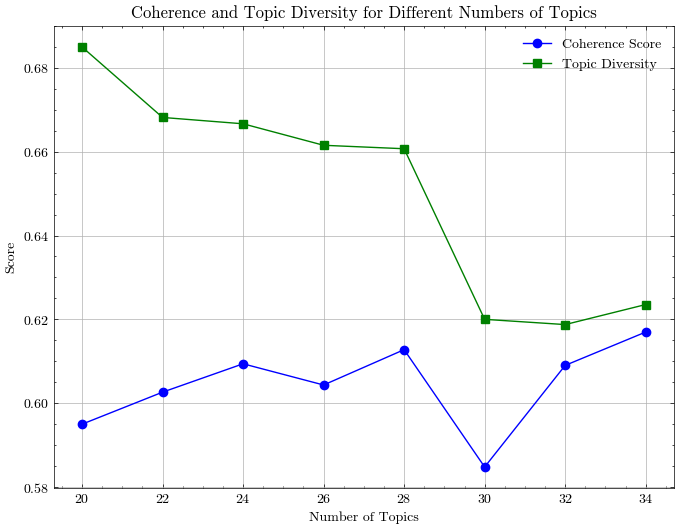

In [44]:
coherence_scores = []
diversity_scores = []  

for num in range(20, 36, 2):
    nmf = NMF(n_components=num, max_iter=1000, random_state=42)
    W = nmf.fit_transform(tfidf_matrix)
    H = nmf.components_

    topics = []
    for topic_idx in range(H.shape[0]):
        top_words = [feature_names[i] for i in H[topic_idx].argsort()[-10:]]
        topics.append(top_words)

    #topic coherence score
    cm = CoherenceModel(topics=topics, texts=cleaned_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = cm.get_coherence()
    
    #topic diversity score
    def get_topic_diversity(beta, topk=10):
        num_topics = beta.shape[0]
        list_w = np.zeros((num_topics, topk), dtype=int)
        for k in range(num_topics):
            idx = beta[k, :].argsort()[-topk:][::-1]
            list_w[k, :] = idx
        n_unique = len(np.unique(list_w))
        TD = n_unique / (topk * num_topics)
        return TD

    topic_diversity = get_topic_diversity(H, topk=10)

    coherence_scores.append(coherence_score)
    diversity_scores.append(topic_diversity)

    print(f"Coherence Score for {num} topics: {coherence_score:.4f}, Topic Diversity: {topic_diversity:.4f}")

# Plot coherence scores
plt.figure(figsize=(8, 6))
plt.plot(range(20, 36, 2), coherence_scores, marker='o', linestyle='-', color='b', label='Coherence Score')
plt.plot(range(20, 36, 2), diversity_scores, marker='s', linestyle='-', color='g', label='Topic Diversity')

plt.title('Coherence and Topic Diversity for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Score')
plt.xticks(range(20, 36, 2))
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Running NMF model on optimal topic no

In [46]:
#tfidf vector
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,                 
    max_df=0.85,              
    max_features=10000,       
    ngram_range=(1, 3),      
)

tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(text) for text in cleaned_texts])
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# NMF model
num_topics = 28  
nmf = NMF(
    n_components=num_topics,  
    init='nndsvd',            
    max_iter=1000,             
    random_state=42            
)

nmf.fit(tfidf_matrix)

NMF(init='nndsvd', max_iter=1000, n_components=28, random_state=42)

In [47]:
#extracting topics & words
n_top_words = 10
feature_names = tfidf_fn

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[-n_top_words:][::-1] 
    top_words = [feature_names[i] for i in top_words_idx]
    print(" - ".join(top_words))
    print()

Topic #1:
image - display - imaging - region - image datum - medical image - pixel - frame - dimensional - image processing

Topic #2:
assembly - shaft - drive - effector - housing - jaw - gear - motor - handle - axis

Topic #3:
light - light source - source - wavelength - illumination - emit - light emit - light guide - illumination light - emission

Topic #4:
ultrasound - ultrasound image - transducer - ultrasound transducer - ultrasound probe - ultrasound imaging - imaging - array - ultrasound system - ultrasound datum

Topic #5:
surgical - instrument - surgical instrument - surgical system - surgical procedure - procedure - surgical device - effector - system - medical instrument

Topic #6:
device - medical device - user - configure - imaging device - display - control - device configure - communication - body

Topic #7:
medical - medical device - medical image - medical instrument - medical imaging - instrument - medical system - medical procedure - plurality medical - medical dat

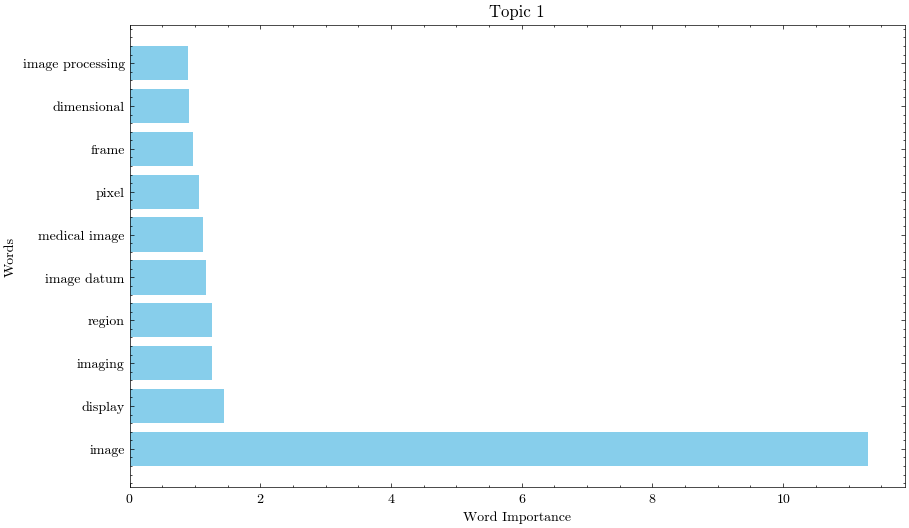

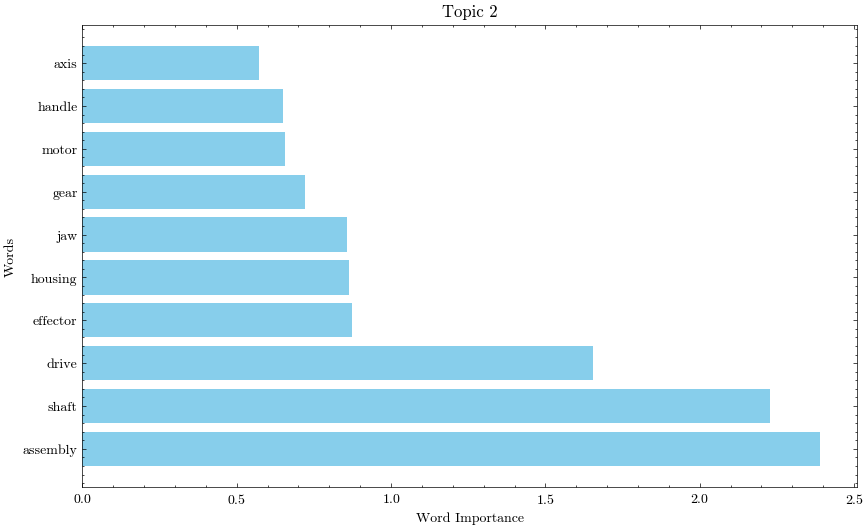

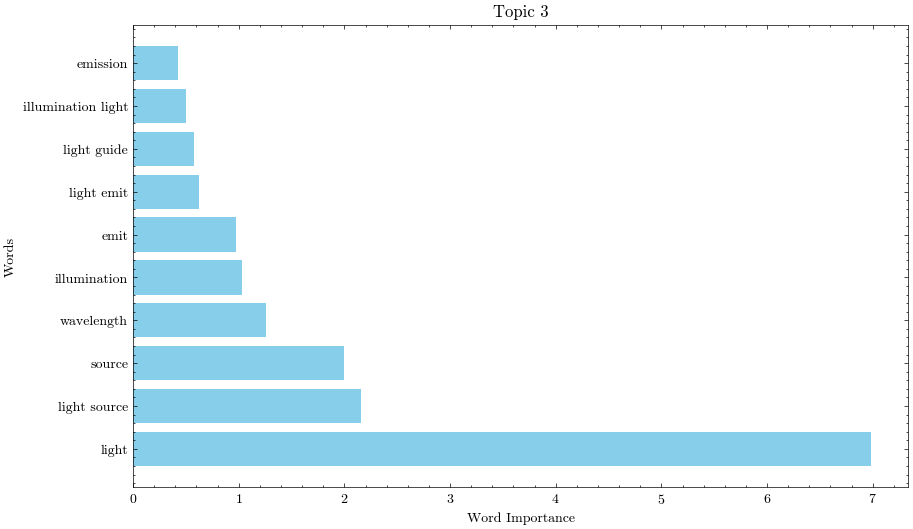

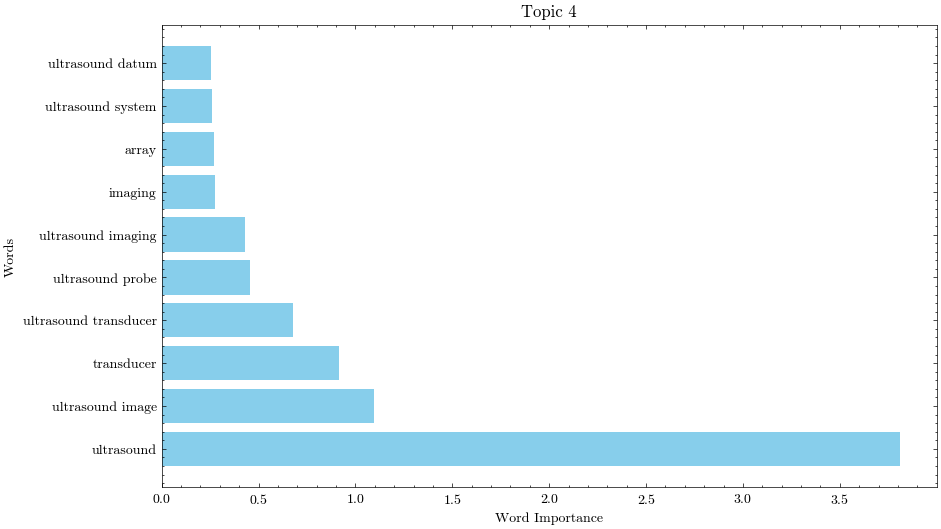

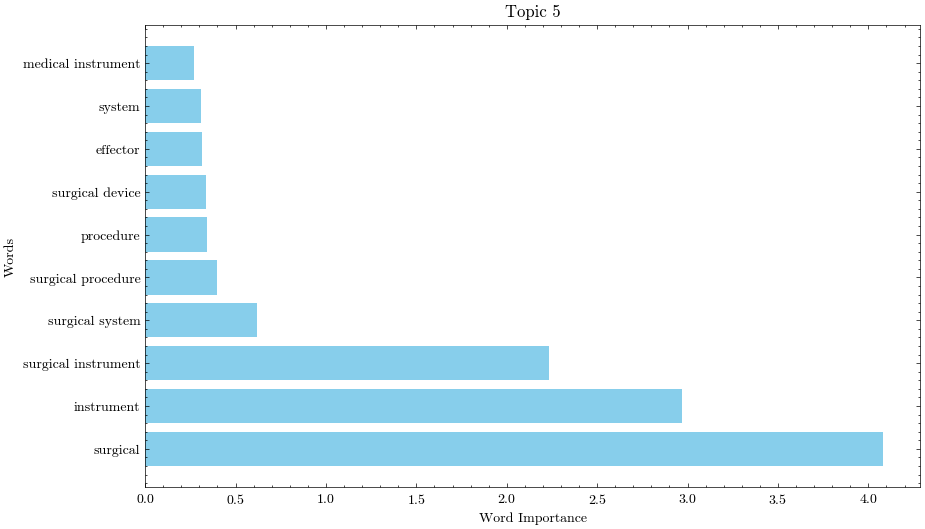

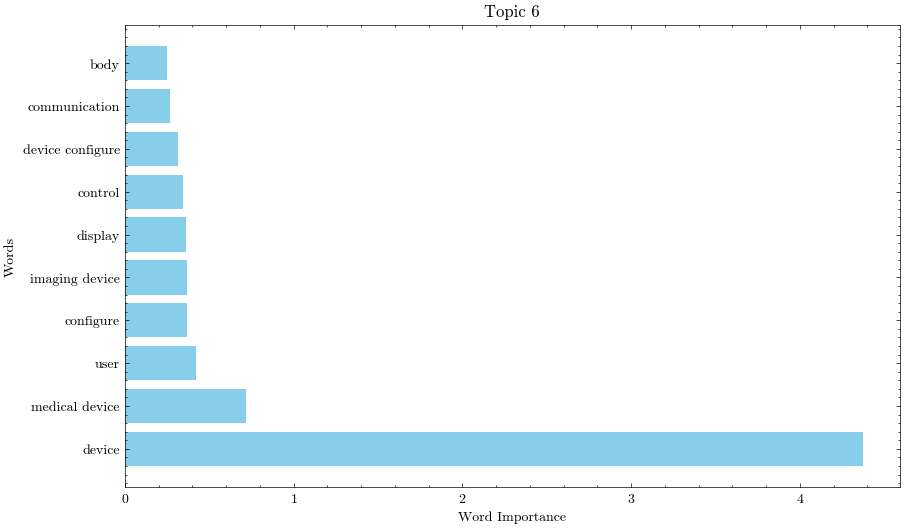

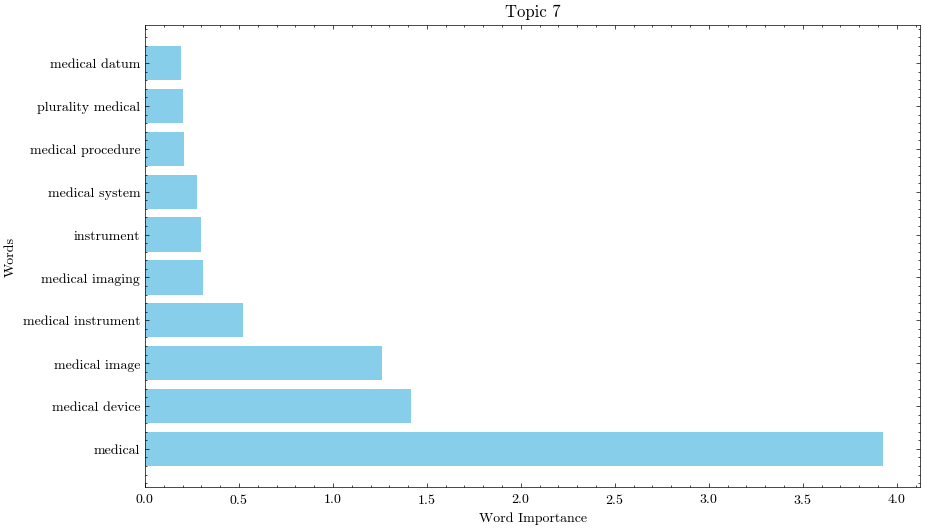

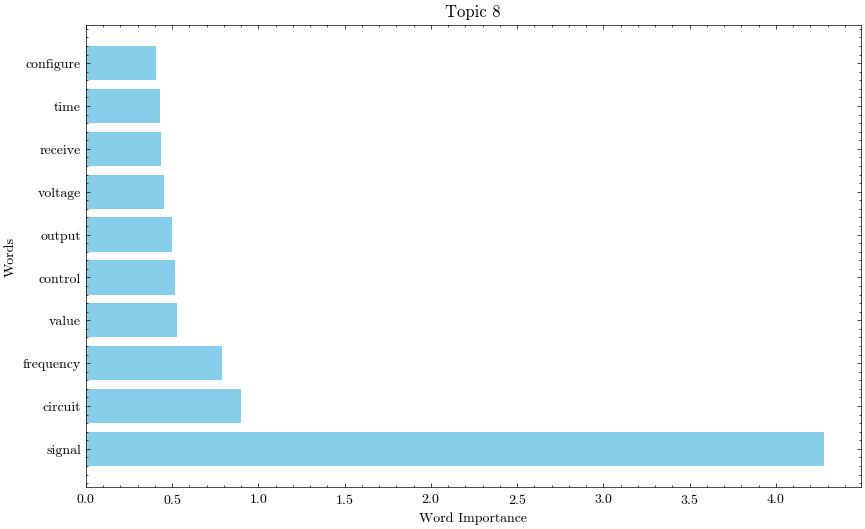

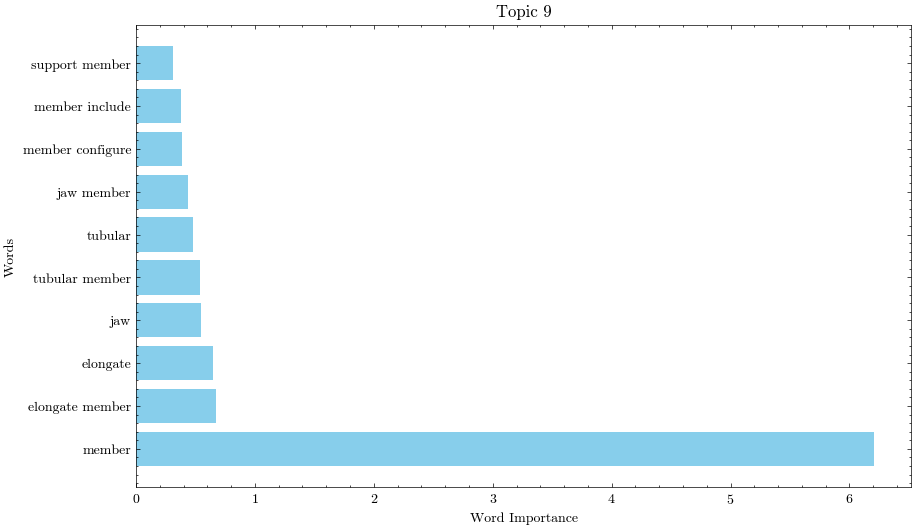

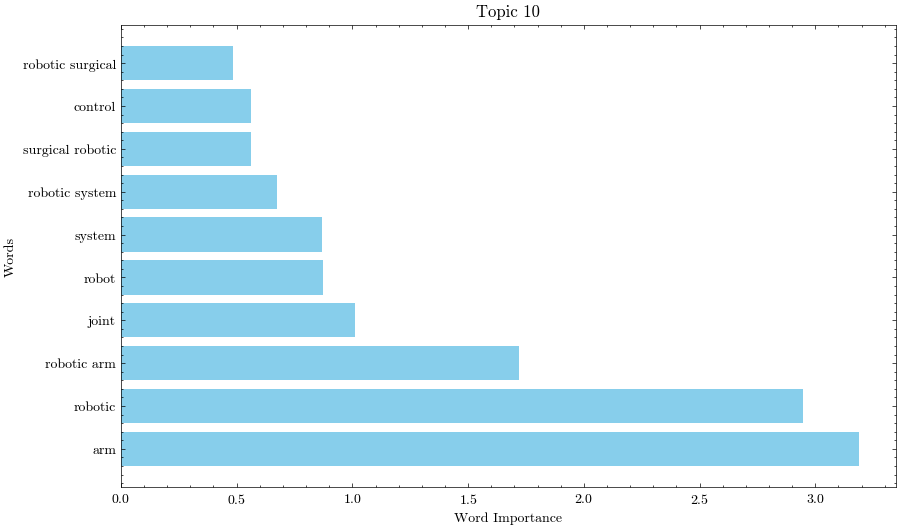

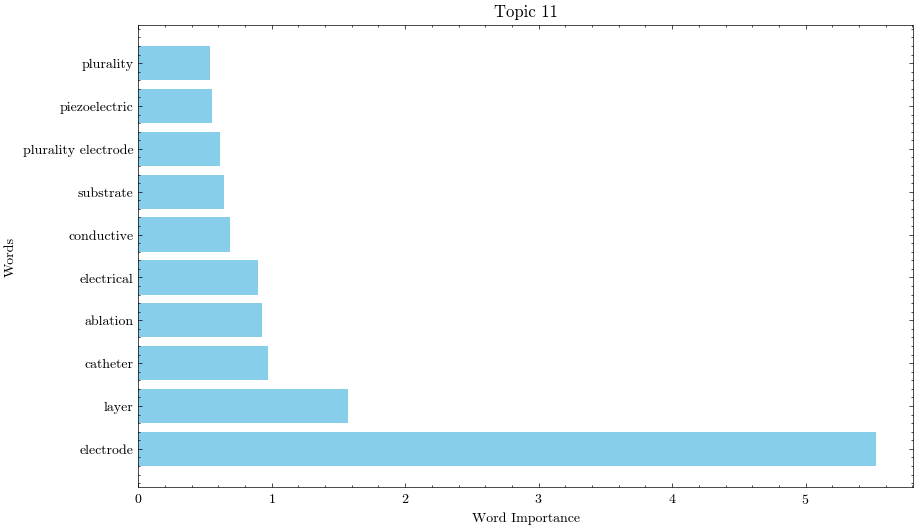

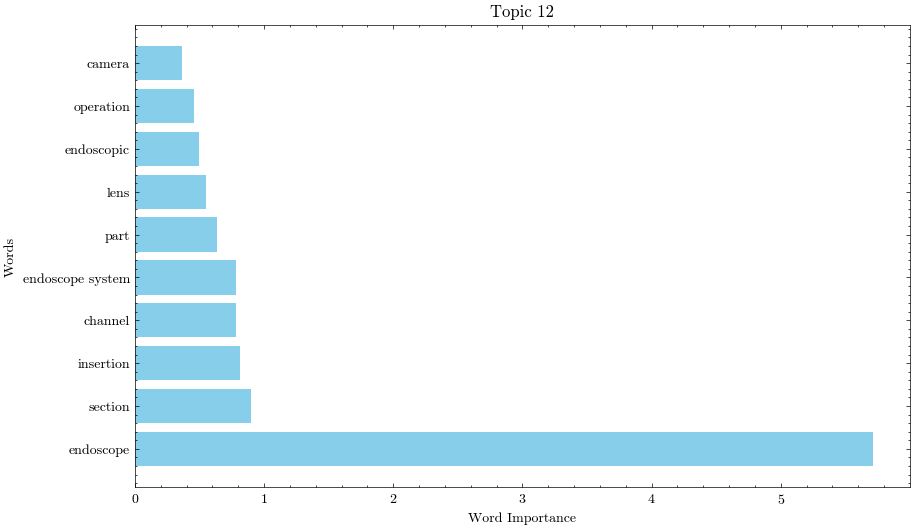

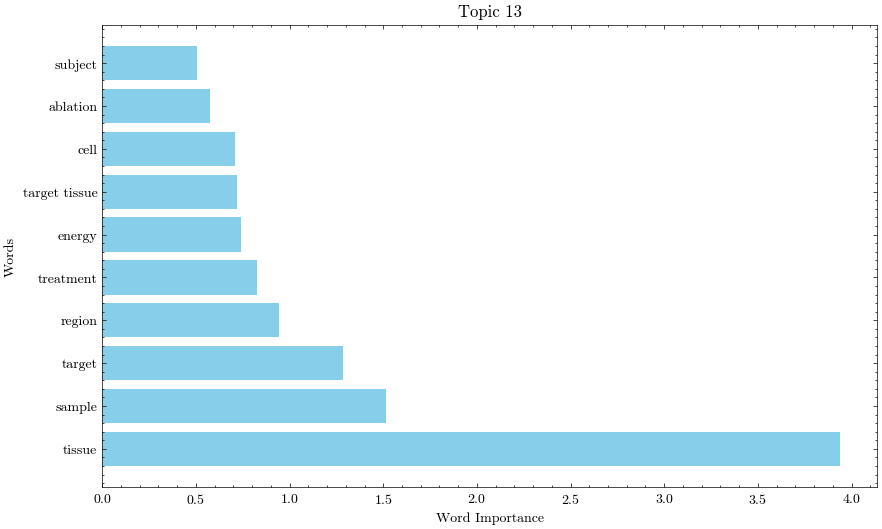

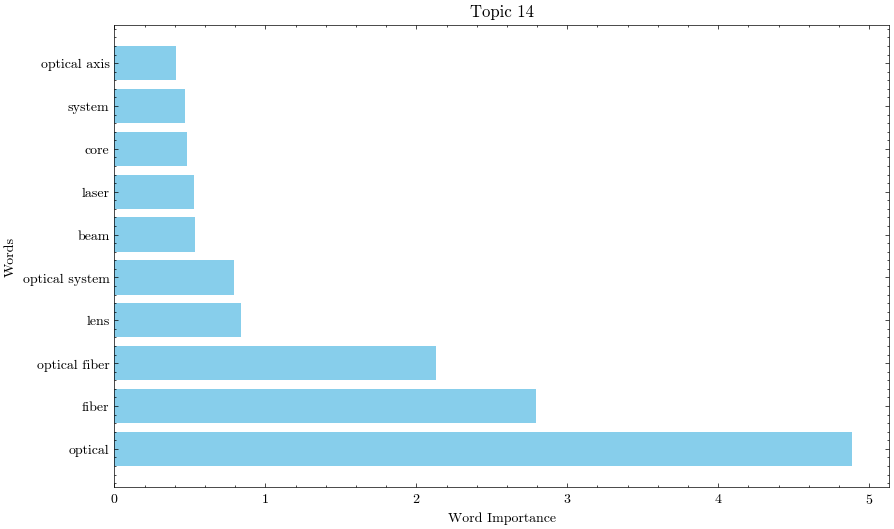

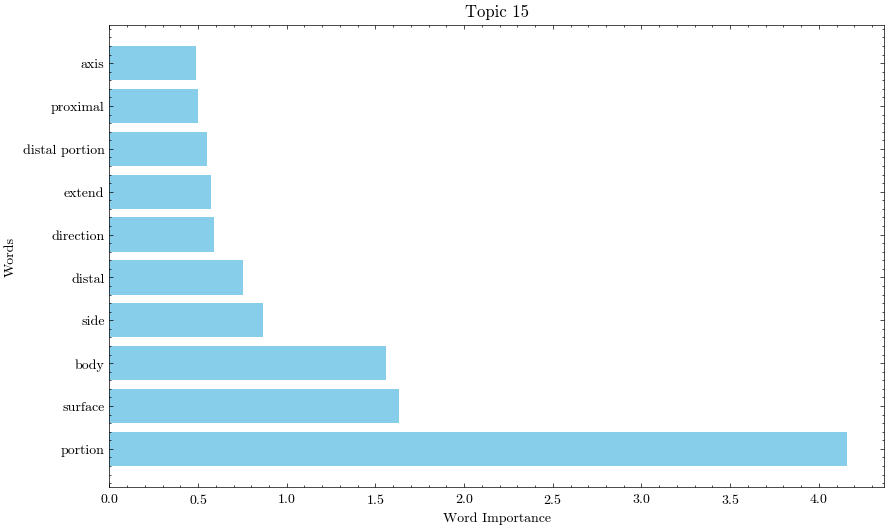

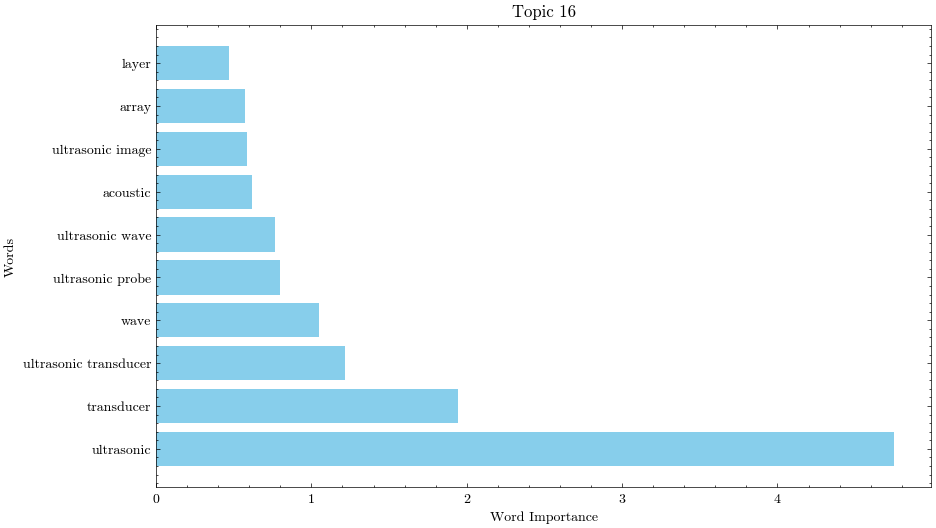

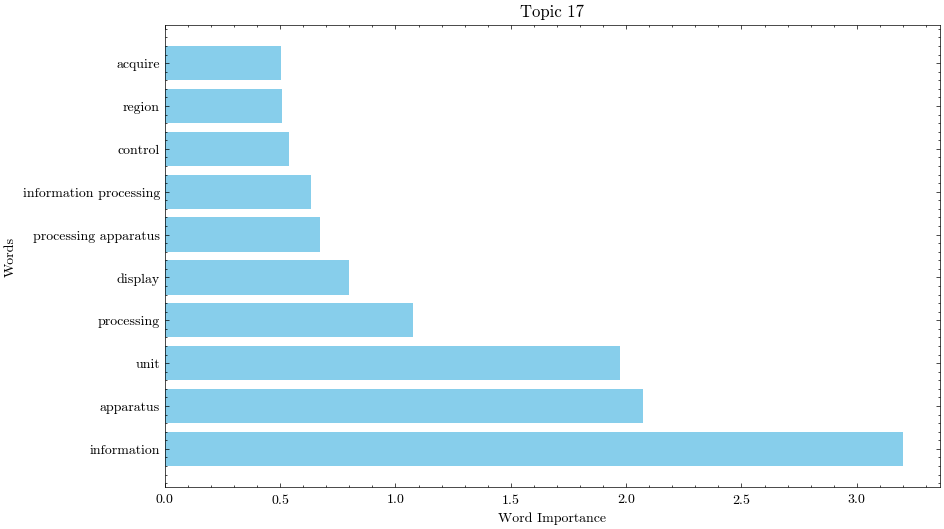

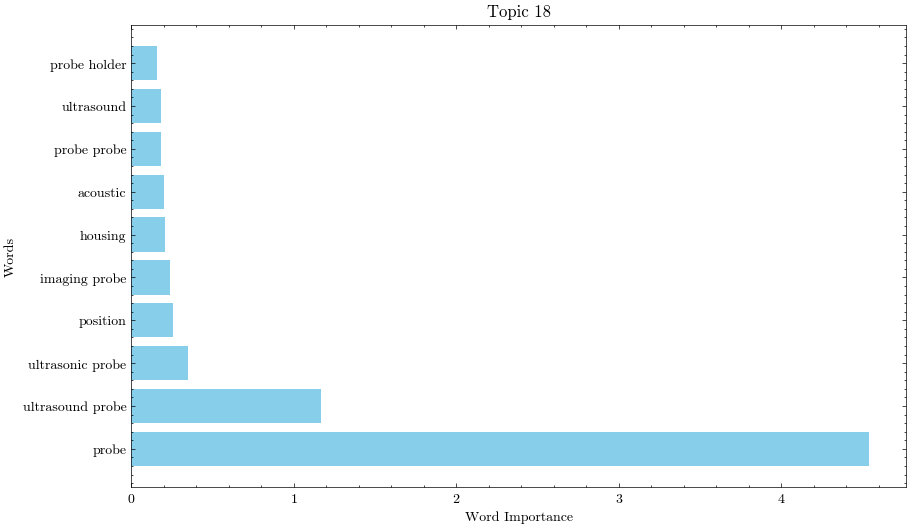

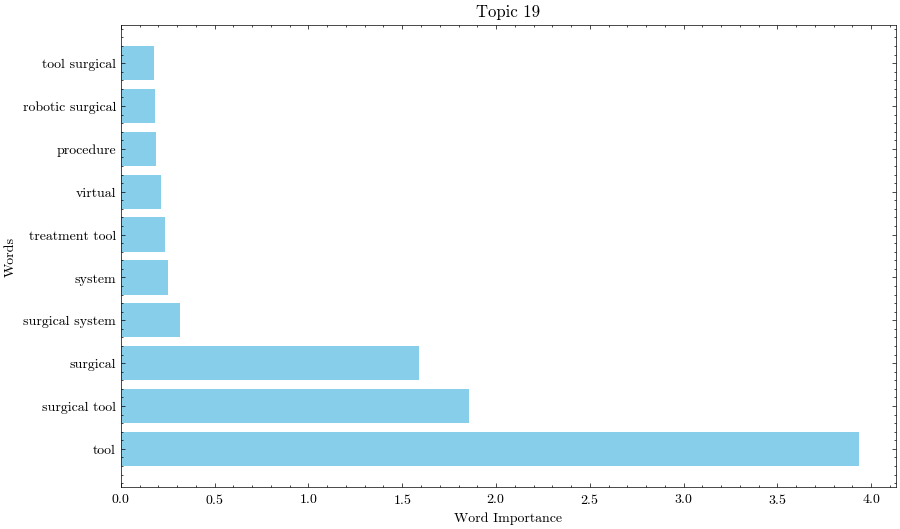

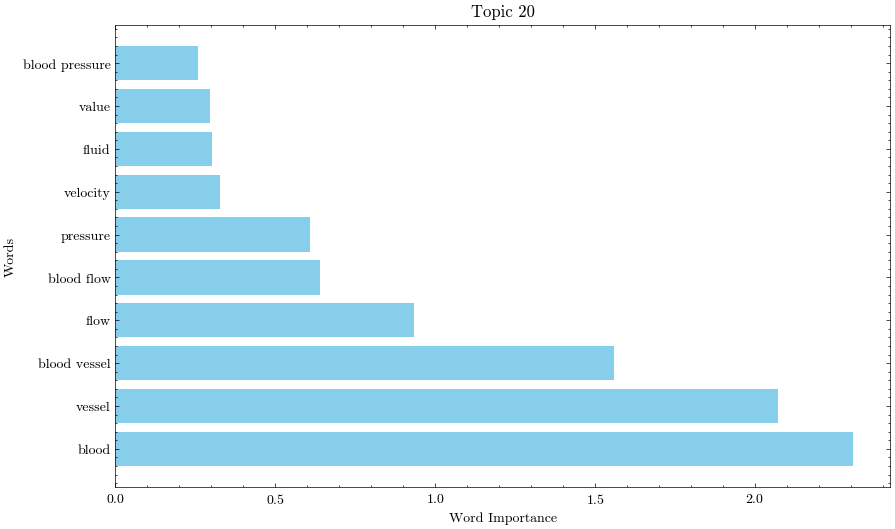

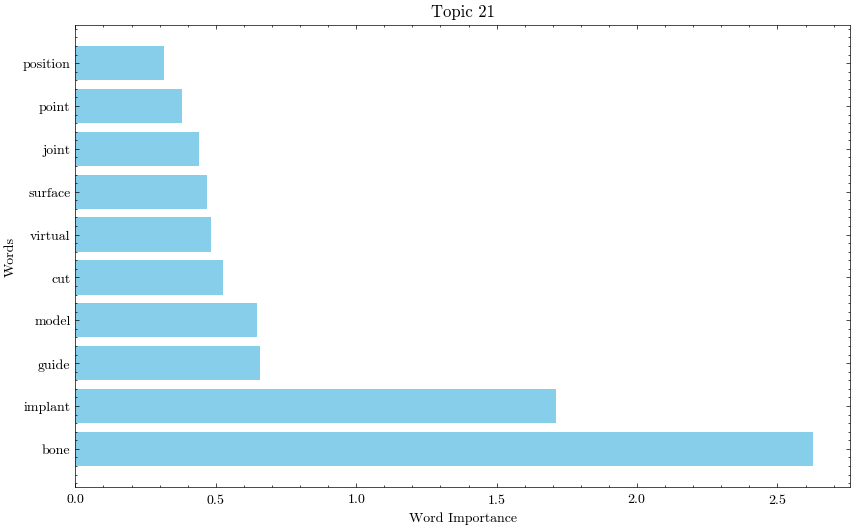

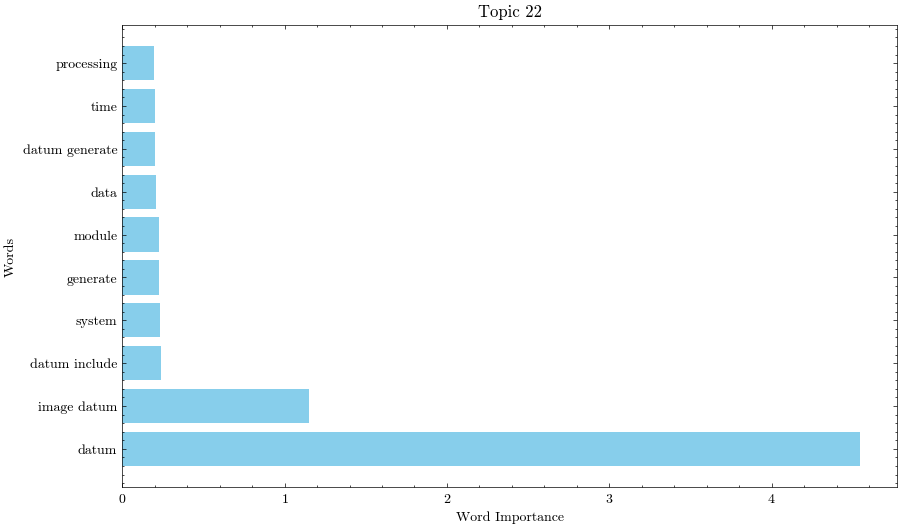

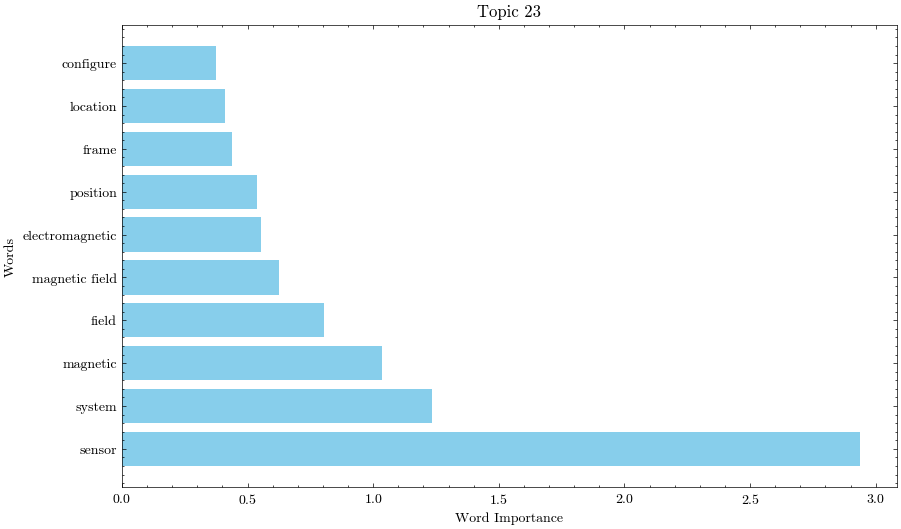

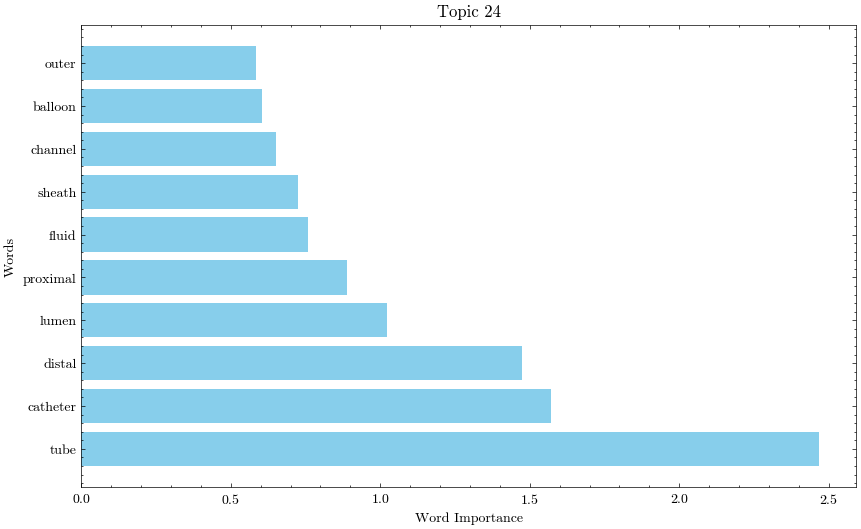

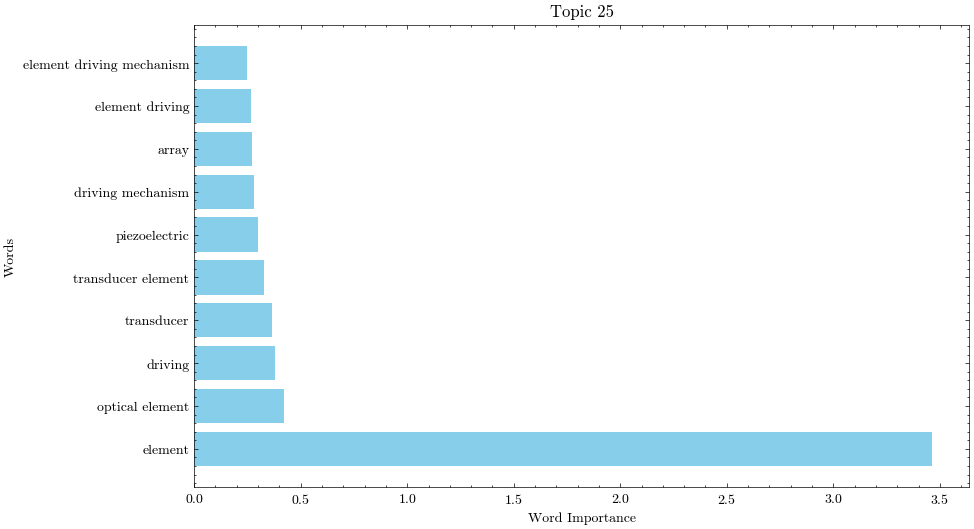

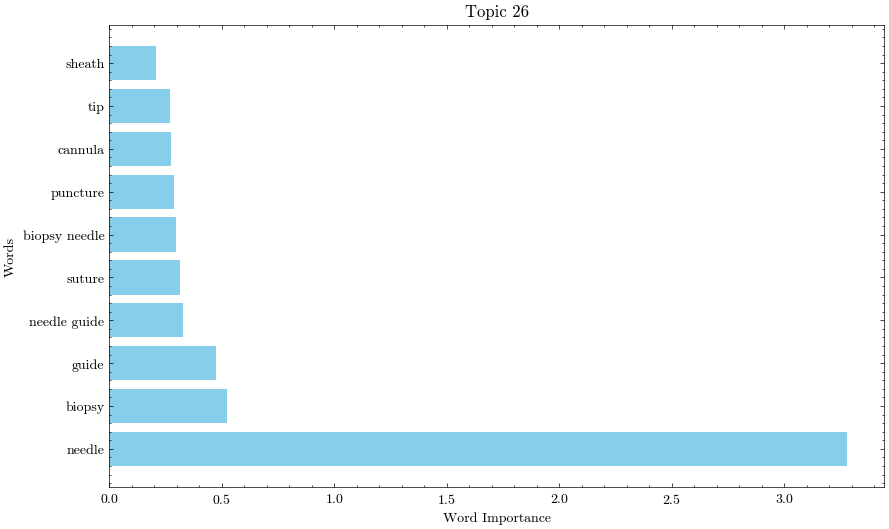

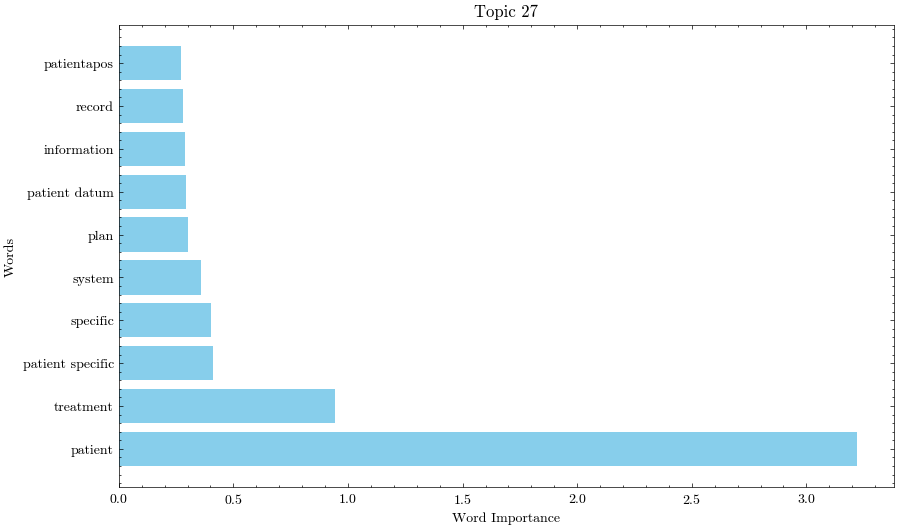

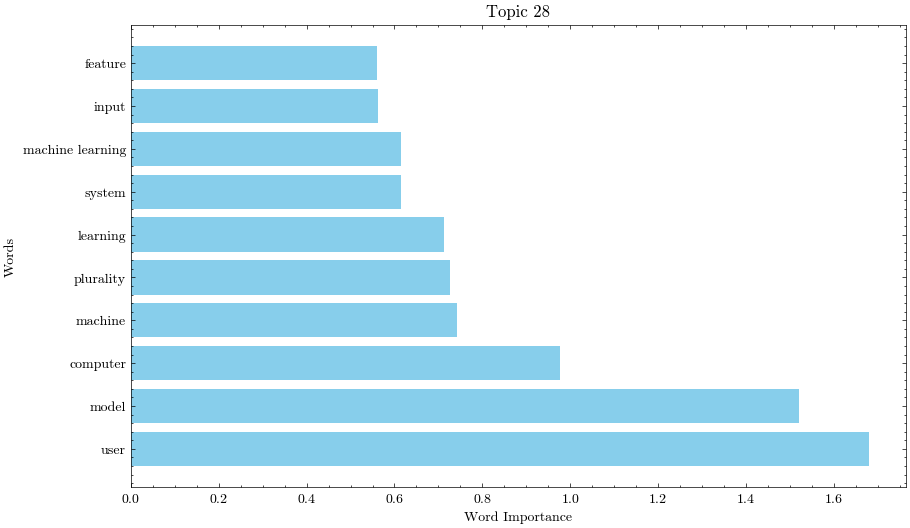

In [48]:
n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()

# Plot the top words for each topic
for topic_idx, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(top_words, topic[top_words_idx], color='skyblue')
    plt.title(f"Topic {topic_idx + 1}")
    plt.xlabel('Word Importance')
    plt.ylabel('Words')
    plt.show()

/Users/mike/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


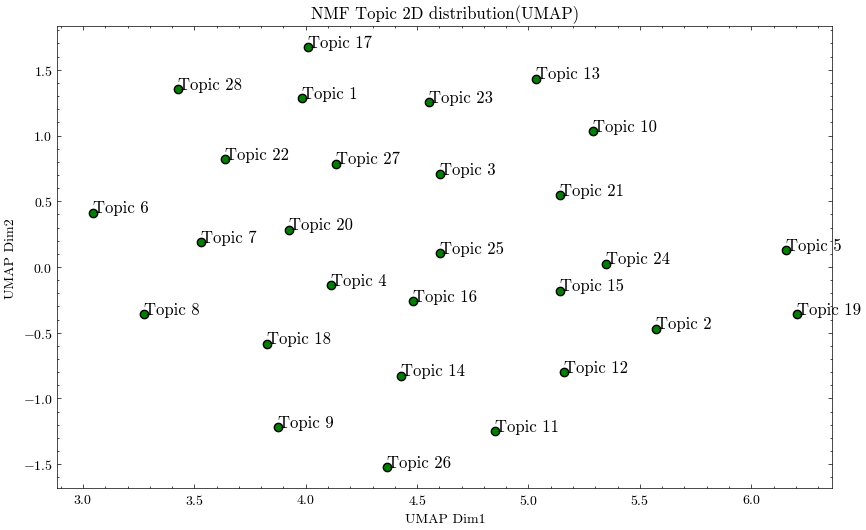

In [49]:
umap_model = umap.UMAP(n_components=2, random_state=42)
topic_umap = umap_model.fit_transform(nmf.components_)

plt.figure(figsize=(10, 6))
plt.scatter(topic_umap[:, 0], topic_umap[:, 1], c='green', edgecolors='k')
for i, txt in enumerate(range(num_topics)):
    plt.annotate(f"Topic {txt + 1}", (topic_umap[i, 0], topic_umap[i, 1]), fontsize=12)
plt.title("NMF Topic 2D distribution(UMAP)")
plt.xlabel("UMAP Dim1")
plt.ylabel("UMAP Dim2")
plt.show()